In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# from torch import nn
from torch import nn # nn contains  sll of PyTorch's buildding blocks for neural network

torch.__version__

'2.5.1+cu124'

# Data (preparaing and loading)

data can be almost anything... in machine learning.

* Excel spreadsheet
* Image of any kind
* Video
* Audio
* DNA
* Text


Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this,let's create some *known* data using the linear regression formula.

we'll use a linear reggression formula to make a straight line with known parameters

In [ ]:
# creating **known* parameters
weight  = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X+bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitiing data into training and test sets

#### Three datasets
1. Traning set -> Traning the model 60-80%
2. Validation set (cross validation set) -> Tune model patterns 10-20%
3. Test set -> Test the perfomance of model (test Generalization of model ) 10-20%


**Generalization** The ability for a machine learning model to perform well on data it hasn't seen before.

In [ ]:
# Lets create traning and testing set with  our data
train_split = int(0.8*len(X))
test_split = len(X)-train_split

train_split, test_split

(40, 10)

In [ ]:
X_train , y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Building a function to represent(visualize) our data
"Visualize, visualize,visualize!"

In [ ]:
def plot_predictions(train_data=X_train , train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    """ Plots training data, test data and compares predictions """
    plt.figure(figsize=(10,7))

    # plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=8, label='Training data')

    # plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=8,label='Testing data')

    #Are the predictions?
    if predictions is not None:
        # plot the predictions if they exist
        plt.scatter(test_data, predictions, c='r', s=4, label='Predicted data')

    # show the legend
    plt.legend(prop={'size':14});


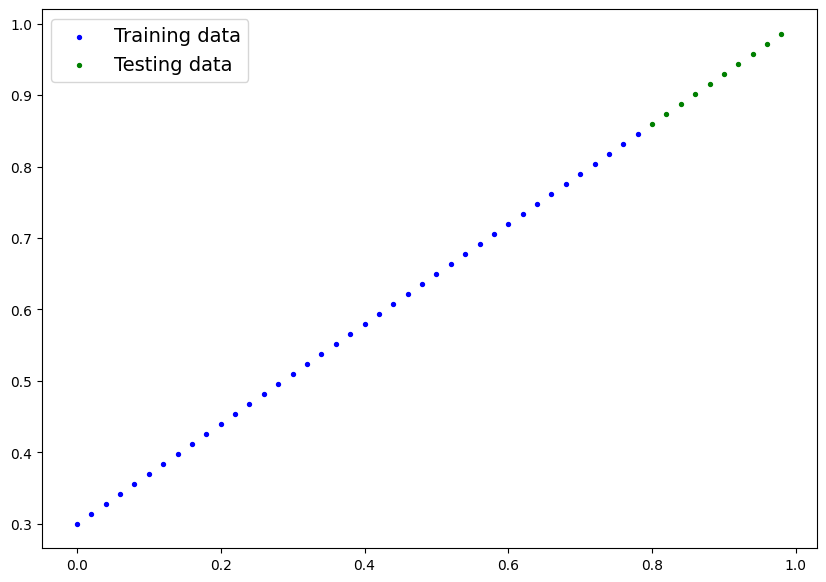

In [ ]:
plot_predictions()

### Creating the first  Pytorch Model for Linear Regression

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent(or get closer to ) the ideal values (the weight & bias values we used to create the data)


How does it do so?
1. Gradient Descent
2. Backpropagation

In [ ]:
# Create linear regression model class
torch.manual_seed(42)
class LinearRegressionModel(nn.Module): # <-  almost everything in PyTorch inherhits from nn.Module
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, #<- start with a random weight and try to adjust it to the ideal weight
                                               requires_grad=True, #<- can this parameter be updated via gradient descent
                                               dtype=torch.float)) #<- this is defalut datatype of pytorch tensor
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # Forward method to define the computation in the model
    def forward(self, x:torch.Tensor)-> torch.Tensor: # <- "x" is the input data
        return self.weight*x+ self.bias # this is the linear regression formula





### pytorch model building essentials

* `torch.nn` - contains all of the building for computational graph (another word for a neural network/a neural network can be considered as a computational graph)

* `torch.nn.parameters` - what paramenters should our model try and learn, often a Pytorch layer form torch.nn will set these for us

* `torch.nn.Module` - The base class for all neural network modules, if you subclass it , you should overwrite forward()

* `torch.optim` - this is where the optimizers in pytorch live, they will help with gradinet descent

* `def forward()` - All nn.Module subclasses require to overide forward(), this method defines what happens in the forward computation

In [ ]:
# create a random seed
torch.manual_seed(42)

# create an instanc of model (this is subclass of nn.Module)

model_0 = LinearRegressionModel()

# cheacking model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# list named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### making predictions using `torch.inference_mode()`
To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's gonna run though the forward() method.

`torch.inference_mode()` -> predicting mode (no gradient required)

`torch.no_grad()` is similar to torch.inference_mode() but torch.inference_mode is somewhat better

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
#with prediction with model
with torch.inference_mode(): #<- turns of the gradient traking as while making predictions we are not traning network so gradient is not required
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

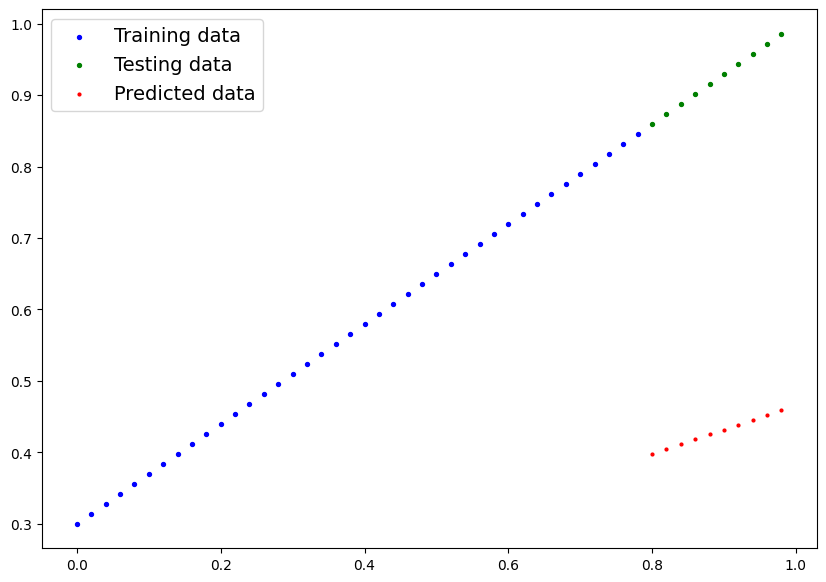

In [ ]:
plot_predictions(predictions=y_preds)

## Training the Model

Idea of traning is move  the model from poor representation of data to better representation of data.

`cost function` or `loss function` function that measures how bad the model perdictions are.

Things we need to train:
* **Loss function:** A function to measure how wrong your model's predictions are to the ideal output, lower is better
* **Optimizer:** Takes into account the loss of a model and adjust the model's paramenters (e.g.  weight & bias) `torch.optim`


And specifically for PyTorch, we need:
* A training loop
* A testing loop


In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# setup a loss function mean abs error loss function
loss_fn = nn.L1Loss()


# setup an optimiser (stochastic gradient descent)
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr =0.01) #lr = learning rate = possibly the most important hyperparameter



## Building a training loop (and a testing loop) in PyTorch

A couple of thing we need in a training loop:
0. Loop through the data
1. Forward pass ( this involvs data moving through our model's `forward()` function ) to make predictions on data - also called forward propogation
2. calculate the loss (compare forward pass predictions tp ground truth labels)
3. optimiser zero grad
4. loss backwards - moves backward trough the network to calculate the gradients of each of the parameteres of our model with respect to the loss (**backpropagation**)
5. optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [ ]:
# an epoch is oe loop through the data... (this is a hyperpaarameters because we've set it)
epochs =100

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []


### training
# 0. Loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train() #train mode in PyTorch  sets all paramters that require gradients to require gradients

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. calculate the loss
    loss = loss_fn(y_pred, y_train)
    print(f"Loss: {loss}")

    # 3. optimizer zero grad
    optimizer.zero_grad()
    # by default how the optimizer change will acumulate through the loop so... we have to zero them so previous optimizer gets clear out

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradinet descent)
    optimizer.step()

    # evaluating the model


    model_0.eval() # turns off diffrent settings in the model not needed for  evaluation/testing



    with torch.inference_mode(): #turns  of gradient traking & a couple of more things behind the scenes
        #1. Do the forward pass
        test_pred = model_0(X_test)

        #2. calculate the test loss
        test_loss = loss_fn(test_pred, y_test)
    if epoch%10==0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | loss: {loss} | Test loss : {test_loss}")
        # Print out model state_dict()
        print(model_0.state_dict())


Loss: 0.31288138031959534
Epoch: 0 | loss: 0.31288138031959534 | Test loss : 0.48106518387794495
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch: 10 | loss: 0.1976713240146637 | Test loss : 0.3463551998138428
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch: 20 | loss: 0.08908725529909134 | Test loss : 0.21729660034179688
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss: 0.08227583020925522
Loss: 0

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
with torch.inference_mode():
    y_pred = model_0(X_test)

In [ ]:
y_pred

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

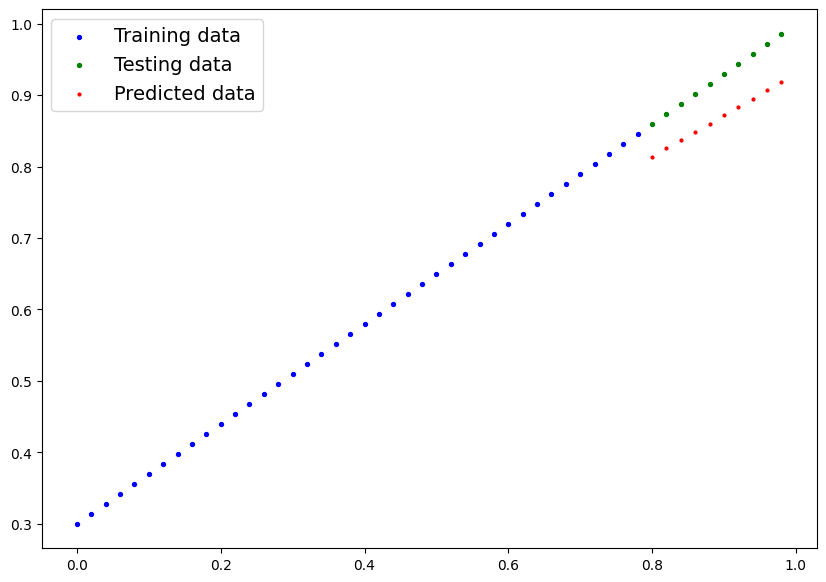

In [ ]:
plot_predictions(predictions=y_pred)

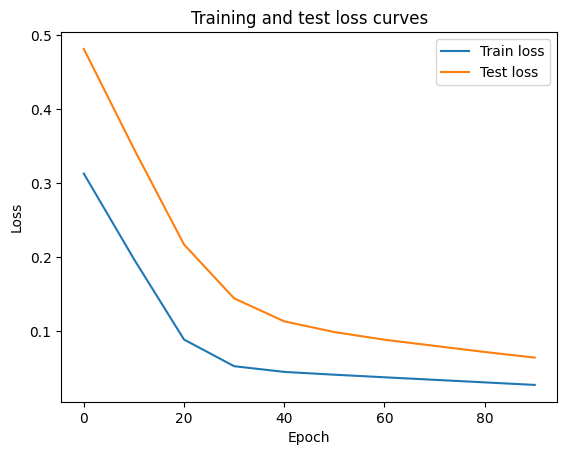

In [ ]:
# plot the loss curves
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label = 'Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title("Training and test loss curves")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.legend();

# Saving a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python'a pickel format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [ ]:
# Saving our PyTorch model
from pathlib import Path
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2, Create model save path
MODEL_NAME = '01_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)
print(f"Saving model to: {MODEL_SAVE_PATH}")


Saving model to: models/01_workflow_model_0.pth


## Loading a PyTorch model
Since we saved our model's `state_dict()` ranther then entire model, we'll create new instance f our model class and load the saved `state_dict()` into that.

In [ ]:
# new instance of model
loaded_model_0 = LinearRegressionModel()


In [ ]:
# loading the model
load_model_state_dict = torch.load(MODEL_SAVE_PATH)

# loading state_dict of new instance of model
loaded_model_0.load_state_dict(load_model_state_dict)

loaded_model_0.state_dict()


<ipython-input-29-57111098d15d>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_model_state_dict = torch.load(MODEL_SAVE_PATH)


OrderedDict([('weight', tensor([0.5784])), ('bias', tensor([0.3513]))])

# Putting it all together

In [ ]:
# Import PyTorch and matplotlib
import torch
import matplotlib.pyplot as plt
from torch import nn


create device agnostic code

In [ ]:
# setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

Data (re-create some data)

In [ ]:
# create some data using  the linear regression formula y = weight*X+bias

weight = 0.9
bias = 0.3

# creating range values

start = 0
end = 1
step = 0.02

# create x and y

X = torch.arange(start, end, step).unsqueeze(dim=1)
print(X)

y = X*weight+bias
print(y)
X.shape, y.shape

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
tensor([[0.3000],
        [0.3180],
        [0.3360],
        [0.3540],
        [0.3720],
        [

(torch.Size([50, 1]), torch.Size([50, 1]))

In [ ]:
# split the data
train_split = int(0.8*len(X))

X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y [train_split:]
X_train.shape, y_train.shape, X_test.shape ,y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

In [ ]:
def plot_predictions2(train_data = X_train, train_label = y_train, test_data=X_test, test_label=y_test, predictions = None):
    plt.scatter(train_data, train_label,c='r', s=10,label='train data')
    plt.scatter(test_data, test_label , c='b', s=10, label='test data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='g',s=6, label='predictions')

    plt.legend(prop={'size':14});

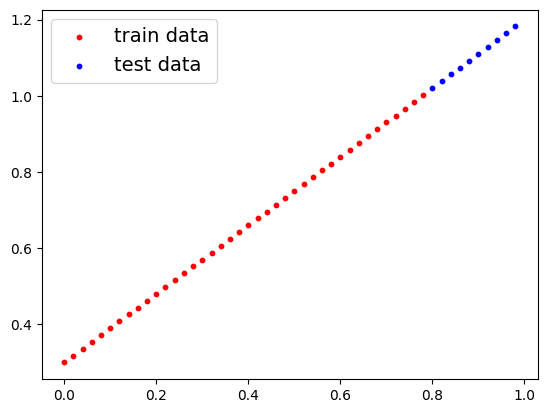

In [ ]:
plot_predictions2()

In [ ]:
## Buildiing a Pytorch linear model

In [ ]:
class LinearRegressionModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float32))
    def forward(self, x):
        return self.weight*x+self.bias



In [ ]:
class LinearRegressionModel3(nn.Module):
    def __init__(self):
        super().__init__()
        # use nn.Linear() for creating the model parameters
        self.Linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x:torch.Tensor)-> torch.Tensor:
        return self.Linear_layer(x)
# set the manual seed
torch.manual_seed(42)

model_1 = LinearRegressionModel3()
model_1, model_1.state_dict()

(LinearRegressionModel3(
   (Linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('Linear_layer.weight', tensor([[0.7645]])),
              ('Linear_layer.bias', tensor([0.8300]))]))

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

## training
for training we need
* loss function
* optimizer
* training loop
* testing loop


In [ ]:
# set up loop function
loss_fuc = nn.L1Loss()

# set up optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)


In [ ]:
#Let's write a training loop
torch.manual_seed(42)

epoches = 200
for epoch in range(epoches):
    # train loop
    model_1.train()

    #1 forward pass
    y_pred = model_1.forward(X_train)

    #2 calculate the loss
    loss = loss_fuc(y_pred, y_train)

    #3 optimiser zero grad
    optimizer.zero_grad()

    #4. Perfrom backpropagation
    loss.backward()

    #5. Optimizer step
    optimizer.step()


    # test loop
    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss =  loss_fn(test_pred, y_test)

    # print out whats happening

    if epoch %10==0:
        print(f"Epoch :{epoch} | Loss: {loss} | Test loss :{test_loss}")





Epoch :0 | Loss: 0.0032001198269426823 | Test loss :0.006601977162063122
Epoch :10 | Loss: 0.007839879021048546 | Test loss :0.0006959676975384355
Epoch :20 | Loss: 0.007839879021048546 | Test loss :0.0006959676975384355
Epoch :30 | Loss: 0.007839879021048546 | Test loss :0.0006959676975384355
Epoch :40 | Loss: 0.007839879021048546 | Test loss :0.0006959676975384355
Epoch :50 | Loss: 0.007839879021048546 | Test loss :0.0006959676975384355
Epoch :60 | Loss: 0.007839879021048546 | Test loss :0.0006959676975384355
Epoch :70 | Loss: 0.007839879021048546 | Test loss :0.0006959676975384355
Epoch :80 | Loss: 0.007839879021048546 | Test loss :0.0006959676975384355
Epoch :90 | Loss: 0.007839879021048546 | Test loss :0.0006959676975384355
Epoch :100 | Loss: 0.007839879021048546 | Test loss :0.0006959676975384355
Epoch :110 | Loss: 0.007839879021048546 | Test loss :0.0006959676975384355
Epoch :120 | Loss: 0.007839879021048546 | Test loss :0.0006959676975384355
Epoch :130 | Loss: 0.007839879021048

In [ ]:
model_1.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[0.8901]])),
             ('Linear_layer.bias', tensor([0.2960]))])

In [ ]:
model_1.eval()
with torch.inference_mode():
    y_pred = model_1(X_test)

y_pred

tensor([[1.0081],
        [1.0259],
        [1.0437],
        [1.0615],
        [1.0793],
        [1.0971],
        [1.1149],
        [1.1327],
        [1.1505],
        [1.1683]])

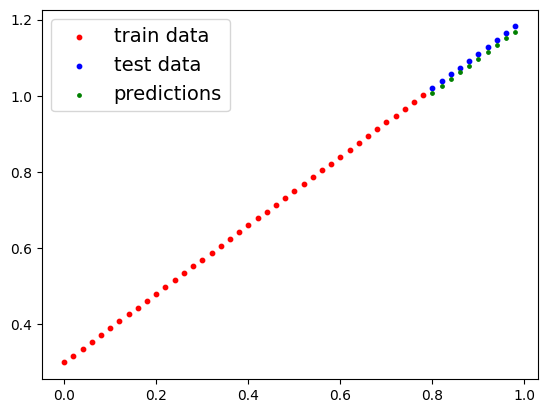

In [ ]:
plot_predictions2(predictions=y_pred)

In [ ]:
from pathlib import Path
print(Path())
Model_path = Path()/'models'
model_name = 'trying_save0.pth'

torch.save(obj = model_1.state_dict(), f = Model_path/model_name)


.


In [ ]:
model_1_load = LinearRegressionModel3()
pkl_file = torch.load(f=Model_path/model_name)

model_1_load.load_state_dict(pkl_file)

<ipython-input-75-84cfe2cb5d06>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pkl_file = torch.load(f=Model_path/model_name)


<All keys matched successfully>

In [ ]:
model_1.state_dict(), model_1_load.state_dict()

(OrderedDict([('Linear_layer.weight', tensor([[0.8901]])),
              ('Linear_layer.bias', tensor([0.2960]))]),
 OrderedDict([('Linear_layer.weight', tensor([[0.8901]])),
              ('Linear_layer.bias', tensor([0.2960]))]))